# Giulia Rapisardi
## CSC 310 Individual Project: Data Analysis and Modeling

## Introduction

The following analysis will be conducted from a data set that provides information from a spotify top 50 songs of 2019 list. 

The data set includes information on the artist of the song, BPM (beats per minute), the genre, and how popular the song is. 

I will be conducting analysis in order to find out what variable that is included in the data set makes a song well liked and influences the popularity and rating. I will also look at how accurate it is to judge a songs success and estimate other characteristics of the song by just looking at the BPM. 

Considering that the higher the BPM usually correlates to fast paced energetic music I hypothesize that there will be a positive, linear, realtionshp between BPM and Rating and BPM and popularity. As energetic and upbeat songs usually capture an audiences attention. 

Furthermore, I will use various functions to compute statistics, regression models, and emphasize patterns in the data set to allow a clear understanding of what makes a song's rating and popularity increase. 

## Body

### *Data*

The data set consists of 50 rows, 12 columns, and 12 variables:

    • Rating - numerical value ranging from 1 - 50
    • Genre - categorical value demonstrating the genre of the track
    • BPM - numerical value demomstrating the beat of the song
    • Energy - numerical value demonstrating the amoung of energy a song has, higher the number the more energy there is. 
    • Danceability - numerical value demonstrating the likeliness you can dance to the song, higher the value the more likely you are able to dance to it. 
    • Loudness - numerical value demonstrating the level of loudness the song has, higher the value the louder the song is. 
    • Liveness - numercial value demonstrating the likelihood that the song is a live recording, higher the value the more likely the song was recorded live. 
    • Valence - numerical value demonstrating the amount of which the song is classified as having a positive mood, higher the value to more positive of a mood the song has. 
    • Length - numerical value demonstrating the length of a song. 
    • Acousticness - numerical value demonstrating the level at which the song hold an acoustic sound, the higher the value to more acoustic sounding the song is. 
    • Speechiness - numerical value determining how many words in the song are spoken and not sung, higher the value the more words are spoken throughout the song. 
    • Popularity - numerical value displaying the popularity of the song, higher to value the more popular the song is. 

Majority of variables from this data set are numerical aside form the **Genre** varaible which is categorical.

The ensure that I would be able to efficiently run the analysis I converted **Genre** to a numerical value below to gain the most accurate results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
import seaborn as sns 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from confint import regression_confint

In [2]:
df = pd.read_csv('Spotify.csv')
df.head()

,Rating,Genre,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,34,atl hip hop,98,59,80,-7,13,18,200,2,15,89
1,27,australian pop,98,59,82,-6,18,54,210,69,10,83
2,36,big room,114,72,66,-7,14,32,164,18,6,89
3,39,boy band,138,73,84,-5,11,95,181,4,6,80
4,46,brostep,88,62,66,-2,58,44,182,7,5,88


In [3]:
df.describe()

,Rating,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [4]:
# creating the new dataset 
df = pd.get_dummies(df)
df.head()

,Rating,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,...,Genre_electropop,Genre_escape room,Genre_latin,Genre_panamanian pop,Genre_pop,Genre_pop house,Genre_r&b en espanol,Genre_reggaeton,Genre_reggaeton flow,Genre_trap music
0,34,98,59,80,-7,13,18,200,2,15,...,0,0,0,0,0,0,0,0,0,0
1,27,98,59,82,-6,18,54,210,69,10,...,0,0,0,0,0,0,0,0,0,0
2,36,114,72,66,-7,14,32,164,18,6,...,0,0,0,0,0,0,0,0,0,0
3,39,138,73,84,-5,11,95,181,4,6,...,0,0,0,0,0,0,0,0,0,0
4,46,88,62,66,-2,58,44,182,7,5,...,0,0,0,0,0,0,0,0,0,0


### *Methods & Analysis*

To gain answers to my data-driven question I will use statistic functions such as minimum, maximum, and mean to gain a better understanding of the numbers in the data set. Followed by running a Regression Tree and KNN regression model to determine the R^2 value of the two variables in question, or in other words how linear their relationship is, along with their confidence interval. 

#### Analysis I

The first question I want to answer is:

    Does BPM (beats per minute) have an influence on the rating of a song?

To determine this I first want to understand what is considered a low or high BPM in the data set along with visualizations to show any trends that may be prominent. 

In [5]:
df['BPM'].min()

85

In [6]:
df['BPM'].max()

190

In [7]:
df['BPM'].mean()

120.06

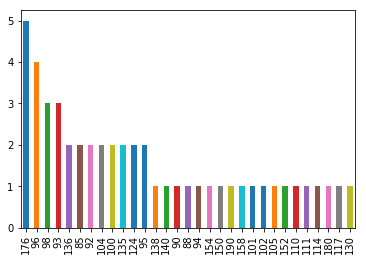

In [8]:
df['BPM'].value_counts().plot(kind='bar')

These statistics show that the highest BPM in the data set is 190, and the lowest is 85 with an average BPM of 120. 

The visualizations show that majority of attributes in the data set have a BPM of over 100. 

To gain more information on how the rating is influenced in the data set I will move forward and run a regression tree analysis and the best model of the KNN regression. 

##### *Regression Tree*

In [9]:
# pick model
model = DecisionTreeRegressor(max_depth=None)
model.fit(df['BPM'].values.reshape(-1,1),df['Rating'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

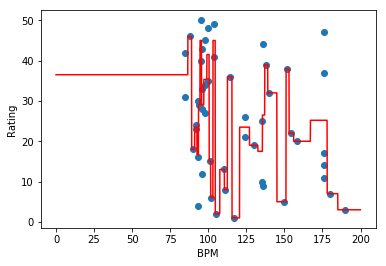

In [10]:
# plot the model ontop of the data
plt.scatter(df['BPM'],df['Rating'])
plt.xlabel('BPM')
plt.ylabel('Rating')

x_ticks = np.arange(0,200.0,0.1)
y_ticks = model.predict(x_ticks.reshape(-1, 1))
plt.plot(x_ticks,y_ticks,"r-")

In [11]:
# R^2 score
rs = model.score(df['BPM'].values.reshape(-1,1),df['Rating'])
observations = df.shape[0]
variables = 1
lb,ub = regression_confint(rs, observations, variables)

# print out R^2 score with its 95% confidence interval
print("R^2 Score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs,lb,ub))

R^2 Score: 0.71 (0.59, 0.84)


##### *KNN Regression*

In [12]:
# create dataset vectors
X = df['BPM'].values.reshape(-1,1)
y = df['Rating']

In [13]:
# setting up grid search
model2 = KNeighborsRegressor()
param_grid = {'n_neighbors': list(range(1,11))}
grid = GridSearchCV(model2, param_grid, cv=5)

In [14]:
# grid search
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
# print best parameters
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'n_neighbors': 7}


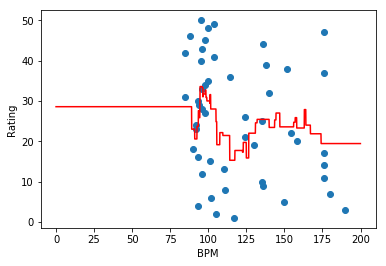

In [16]:
# plot the best model ontop of the data
plt.scatter(df['BPM'],df['Rating'])
plt.xlabel('BPM')
plt.ylabel('Rating')

best_model = grid.best_estimator_
x_ticks2 = np.arange(0,200.0,0.1)
y_ticks2 = best_model.predict(x_ticks2.reshape(-1, 1))
plt.plot(x_ticks2,y_ticks2,"r-")

In [17]:
# compute the R^2 score and 95% Confidence Interval of the best model
rs2 = best_model.score(df['BPM'].values.reshape(-1,1),df['Rating'])
observations2 = df.shape[0]
variables2 = 1
lb2, ub2 = regression_confint(rs2, observations2, variables2)
print("R^2 score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs2,lb,ub))

R^2 score: 0.19 (0.59, 0.84)


### *Conclusion*

After running a regression tree analysis and a best model KNN Regression I received the R^2 Score and confidence interval for both models

    R^2 score: 0.71 (0.59, 0.84)
    R^2 score: 0.19 (0.00, 0.37)
    
As we can see the two intervals do not overlap. This tells us that the difference in model performance is significant. We can also see that the R^2 score for the regression tree model is significantly more linearized and accurate than the KNN regression model. 

Overall, these two models tell us that the relationship between BPM and Rating is not linear. Therefore there is no direct trend that the higher the BPM, the higher the Rating and vice versa. 

#### Analysis II

Another aspect of the data set was the popularity of the song, which leads to my second question of analysis:
    
    Does BPM effect the popularity of a song?
    
To conclude if this is true I will start by determining what is considered a high or low popularity score



In [18]:
df['Popularity'].min()

70

In [19]:
df['Popularity'].max()

95

In [20]:
df['Popularity'].mean()

87.5

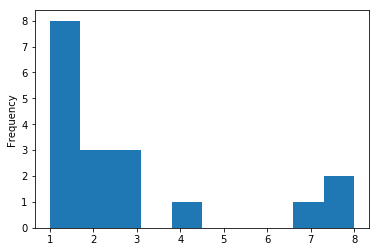

In [21]:
df['Popularity'].value_counts().plot(kind='hist')

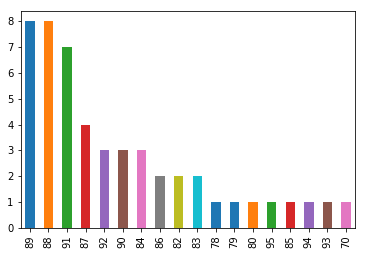

In [22]:
df['Popularity'].value_counts().plot(kind='bar')

These statistics show that the highest popularity score in the dataset is 95 and the lowest is 70. 

Looking at the visualizations we can also interpret that a good portion of popularity scores are above the average score of 87. 

To see if there is a relationship between these high popularity scores and whether or not they are impacted by the BPM of the song. 

##### *Regression Tree*

In [23]:
# pick model
model3 = DecisionTreeRegressor(max_depth=None)
model3.fit(df['BPM'].values.reshape(-1,1),df['Popularity'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

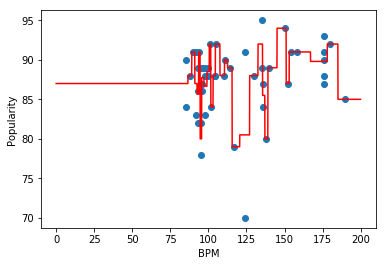

In [24]:
# plot the model ontop of the data
plt.scatter(df['BPM'],df['Popularity'])
plt.xlabel('BPM')
plt.ylabel('Popularity')

x_ticks3 = np.arange(0,200.0,0.1)
y_ticks3 = model3.predict(x_ticks3.reshape(-1, 1))
plt.plot(x_ticks3,y_ticks3,"r-")

In [25]:
# R^2 score
rs3 = model3.score(df['BPM'].values.reshape(-1,1),df['Popularity'])
observations3 = df.shape[0]
variables3 = 1
lb3,ub3 = regression_confint(rs3, observations3, variables3)

# print out R^2 score with its 95% confidence interval
print("R^2 Score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs3,lb3,ub3))

R^2 Score: 0.62 (0.46, 0.78)


##### *KNN Regression*

In [26]:
# create dataset vectors
X4 = df['BPM'].values.reshape(-1,1)
y4 = df['Popularity']

In [27]:
# set up the grid
model4 = KNeighborsRegressor()
param_grid = {'n_neighbors': list(range(1,11))}
grid = GridSearchCV(model4, param_grid, cv=5)

In [28]:
# grid search 
grid.fit(X4,y4)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
# print best parameters
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'n_neighbors': 10}


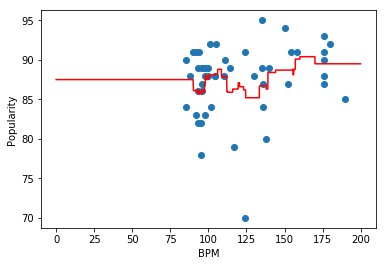

In [30]:
# plot the best model ontop of the data
plt.scatter(df['BPM'],df['Popularity'])
plt.xlabel('BPM')
plt.ylabel('Popularity')

best_model4 = grid.best_estimator_
x_ticks4 = np.arange(0,200.0,0.1)
y_ticks4 = best_model4.predict(x_ticks4.reshape(-1, 1))
plt.plot(x_ticks4,y_ticks4,"r-")

In [31]:
# compute the R^2 score and 95% Confidence Interval of the best model
rs4 = best_model4.score(df['BPM'].values.reshape(-1,1),df['Popularity'])
observations4 = df.shape[0]
variables4 = 1
lb4, ub4 = regression_confint(rs4, observations4, variables4)
print("R^2 score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs4,lb4,ub4))

R^2 score: 0.13 (0.00, 0.30)


### Conclusion

After running the regresion tree and KNN regression analysis I received the two R^2 scores and confidence intervals for both models

    R^2 0.62 (0.46, 0.78)
    R^2 0.13 (0.00, 0.30)
    
the two confidence intervals do not overlap, which tells us that both tests are significant. To determine which test to refer to when trying to make a decision about the relationship between the two variables we look to the R^2 scores which in this case the regression tree model is much more accurate than the KNN model, with an accuracy score of 0.62. 

Overall, these two models show us that the relationship between the BPM and Popularity is not a linear relationship os we cannot make the assumption that the higher the BPM the more likely the song will have a higher popularity score and vice versa. 

## Results

After processing the results from the different regression models it is clear that you cannot predict the rating or popularity of a song by just looking at one variable of the data set. The results when comparing rating and BPM or rating and popularity are not ideal, as I would prefer better R^2 scores with confidence intervals that were smaller and at a higher range. 

When comparing the two regression models we see in the first analysis the results

    R^2 score: 0.71 (0.59, 0.84)
    R^2 score: 0.19 (0.00, 0.37)
    
and the second analysis 

    R^2 0.62 (0.46, 0.78)
    R^2 0.13 (0.00, 0.30)
    
    
The results received from the analyses run are similar in numbers but both show the need for further analysis and to incorporate more variables to receive higher R^2 scores. 
    

Overall, I discovered that my initial hypothesis was wrong. BPM does not have a direct relationship with Rating or Popularity. To only look at BPM to determine results does not provide the most accurate information compared to evaluating multiple variables along with BPM. 